<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

## Ingest Data from links below

In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import gdown
url = 'https://drive.google.com/u/0/uc?id=1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB&export=download'
# output = '/content/drive/MyDrive/03-M2/Proje/cat_dog_data.zip' # download drive
output = 'cat_dog_data.zip' # download colab
gdown.download(url, output, quiet=False)

# !unzip -oq 'cell_images.zip' -d '/content' # unzip from colab to colab content
!unzip -oq $output # unzip from $output == 'cell_images.zip' in colab content

Downloading...
From: https://drive.google.com/u/0/uc?id=1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB&export=download
To: /content/cat_dog_data.zip
100%|██████████| 595M/595M [00:02<00:00, 252MB/s]


In [4]:
# !unzip -oq 'cell_images.zip'

In [5]:
# import zipfile

# # Unzip the file
# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/cell_images.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [6]:
# Alternative method linux bash command
!sudo apt-get install tree -q
!tree -d ./data/

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (123 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-o

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [8]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
seed = random_state = 42

# Recognizing and Understanding Data

In [10]:
data_dir = "./data/"

test_path = data_dir+'test/'
train_path = data_dir+'train/'
validation_path = data_dir+'validation/'

total_test = len(os.listdir(test_path))
total_train = len(os.listdir(train_path+'dog')) + len(os.listdir(train_path+'cat'))
total_validation = len(os.listdir(validation_path+'dog')) + len(os.listdir(validation_path+'cat'))

print(f'''Test size: {total_test:>10}
Train size: {total_train:>10}
Validation size: {total_validation:<10}''')

Test size:       6897
Train size:      17526
Validation size: 2290      


**Let's check how many images there are.**

In [11]:
# # Alternative method linux bash command
# !find ./data/test -type f | echo 'Test:' $(wc -l) && \
# find ./data/train -type f | echo 'Train:' $(wc -l) && \
# find ./data/validation -type f | echo 'Validation:' $(wc -l)

In [12]:
# Alternative method linux bash command
bash = '''
find ./data/test -type f | echo 'Test:' $(wc -l), && \
find ./data/train -type f | echo 'Train:' $(wc -l), && \
find ./data/validation -type f | echo 'Validation:' $(wc -l)'''

import os
run = os.popen(bash).read().split(',')
print(*run)

Test: 6897 
Train: 17526 
Validation: 2290



In [13]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in './data/'.
There are 2 directories and 0 images in './data/validation'.
There are 0 directories and 1219 images in './data/validation/cat'.
There are 0 directories and 1071 images in './data/validation/dog'.
There are 0 directories and 6897 images in './data/test'.
There are 2 directories and 0 images in './data/train'.
There are 0 directories and 12500 images in './data/train/cat'.
There are 0 directories and 5026 images in './data/train/dog'.


In [14]:
# Alternative method linux bash command
!find ./data -type f -printf "%h\n" | sort | uniq -c 

   6897 ./data/test
  12500 ./data/train/cat
   5026 ./data/train/dog
   1219 ./data/validation/cat
   1071 ./data/validation/dog


**Let's check how many classes there are.**

In [15]:
os.listdir(data_dir)

['validation', 'test', 'train']

In [16]:
os.listdir(train_path)

['cat', 'dog']

In [17]:
classes = os.listdir(train_path)
classes

['cat', 'dog']

In [18]:
# Alternative method
import pathlib

data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['cat' 'dog']


In [19]:
class_names

array(['cat', 'dog'], dtype='<U3')

**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [20]:
os.listdir(train_path+'cat')[:10]

['cat.9973.jpg',
 'cat.10804.jpg',
 'cat.681.jpg',
 'cat.2095.jpg',
 'cat.9443.jpg',
 'cat.7966.jpg',
 'cat.10226.jpg',
 'cat.10296.jpg',
 'cat.7677.jpg',
 'cat.2034.jpg']

In [21]:
os.listdir(train_path+'cat')[5]

'cat.7966.jpg'

In [22]:
cat_cell_path = train_path+'cat/'+os.listdir(train_path+'cat')[5]

In [23]:
imread(cat_cell_path)

array([[[111,  99, 101],
        [115, 103, 105],
        [120, 108, 110],
        ...,
        [ 74,  62,  62],
        [ 71,  59,  59],
        [ 69,  57,  57]],

       [[114, 102, 104],
        [118, 106, 108],
        [123, 111, 113],
        ...,
        [ 75,  63,  63],
        [ 72,  60,  60],
        [ 70,  58,  58]],

       [[119, 107, 107],
        [123, 111, 113],
        [128, 116, 118],
        ...,
        [ 75,  63,  63],
        [ 73,  61,  61],
        [ 70,  58,  58]],

       ...,

       [[ 37,  31,  17],
        [ 36,  30,  16],
        [ 36,  30,  16],
        ...,
        [126, 112, 101],
        [130, 116, 105],
        [135, 121, 110]],

       [[ 36,  30,  16],
        [ 36,  30,  16],
        [ 35,  29,  15],
        ...,
        [177, 163, 154],
        [177, 163, 154],
        [176, 162, 153]],

       [[ 36,  30,  16],
        [ 35,  29,  15],
        [ 35,  29,  15],
        ...,
        [192, 177, 172],
        [190, 175, 170],
        [187, 172, 167]]

In [24]:
cat_cell= imread(cat_cell_path)

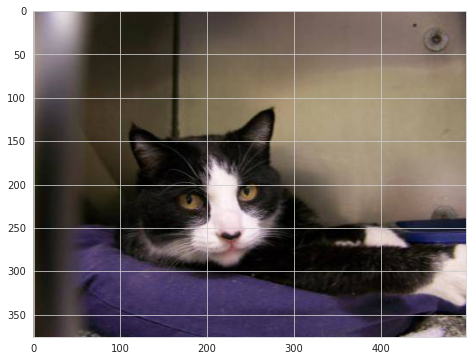

In [25]:
plt.imshow(cat_cell);

In [26]:
cat_cell.shape

(376, 499, 3)

In [27]:
os.listdir(train_path+'dog')[:10]

['dog.169.jpg',
 'dog.10415.jpg',
 '2484.jpg',
 'dog.10360.jpg',
 'dog.12180.jpg',
 'dog.1028.jpg',
 'dog.1359.jpg',
 'dog.10448.jpg',
 'dog.1060.jpg',
 'dog.2061.jpg']

In [28]:
dog_cell_path = train_path+'dog/'+os.listdir(train_path+'dog')[5]

In [29]:
imread(dog_cell_path)

array([[[70, 72, 87],
        [61, 60, 76],
        [63, 61, 75],
        ...,
        [36, 34, 35],
        [45, 43, 44],
        [51, 49, 50]],

       [[66, 65, 79],
        [59, 59, 71],
        [68, 66, 77],
        ...,
        [36, 34, 35],
        [44, 42, 43],
        [50, 48, 49]],

       [[64, 65, 70],
        [61, 60, 66],
        [73, 71, 76],
        ...,
        [35, 33, 34],
        [43, 41, 42],
        [48, 46, 47]],

       ...,

       [[64, 62, 63],
        [95, 93, 94],
        [86, 84, 85],
        ...,
        [29, 28, 26],
        [34, 33, 31],
        [37, 36, 34]],

       [[60, 58, 59],
        [86, 84, 85],
        [78, 76, 77],
        ...,
        [33, 32, 30],
        [38, 37, 35],
        [41, 40, 38]],

       [[57, 55, 56],
        [74, 72, 73],
        [68, 66, 67],
        ...,
        [37, 36, 34],
        [42, 41, 39],
        [45, 44, 42]]], dtype=uint8)

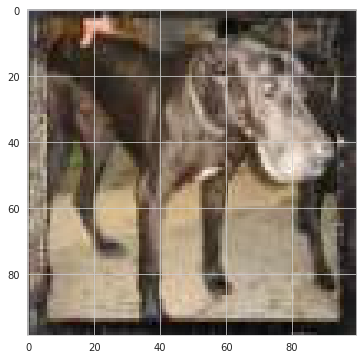

In [30]:
#plt.imshow(imread(dog_cell_path));
dog_cell = imread(dog_cell_path)
plt.imshow(dog_cell);

In [31]:
dog_cell.shape

(99, 100, 3)

## let's check sample Image

In [70]:
def view_n_image(target_dir, target_class, start=0, end=15, col=5, random=False):
  # View a random image
  import random
  
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  image_list = os.listdir(target_folder)[start:end]
  if random:
    image_list = random.sample(os.listdir(target_folder), 15)
  # Read in the image and plot it using matplotlib
  for i, image in enumerate(image_list):
    img = imread(target_folder + "/" + image)
    ax = plt.subplot(int(np.ceil(len(image_list)/col)), col, i+1)   
    ax.imshow(img)
    ax.set_title(target_class)
    plt.xlabel(f'{img.shape}');
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()

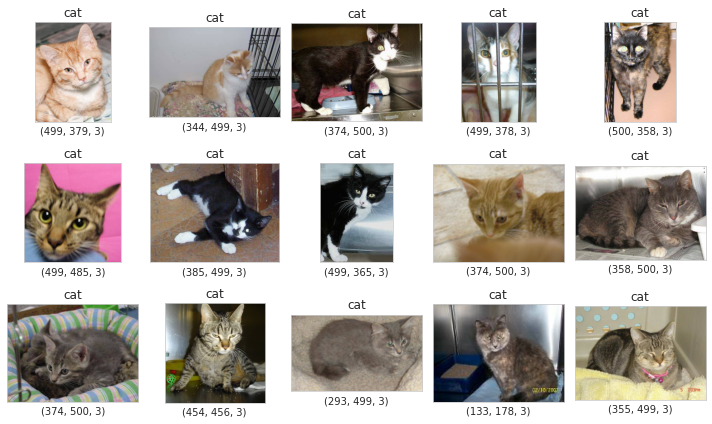

In [71]:
# View a first 15 image from the training dataset
view_n_image(
    target_dir=train_path,
    target_class="cat"
)

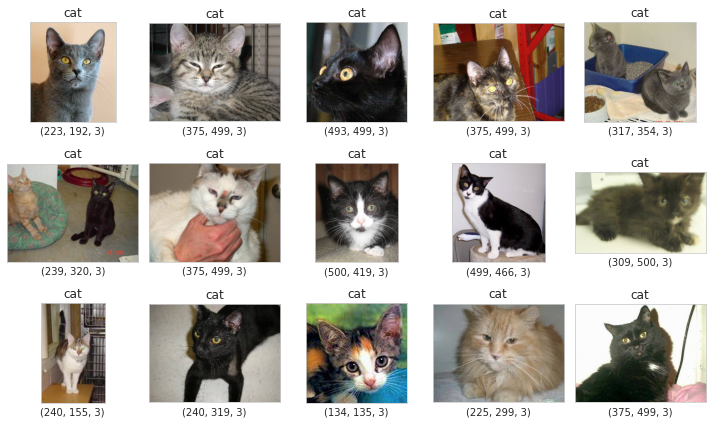

In [72]:
# View a random 15 image from the training dataset
view_n_image(
    target_dir=train_path,
    target_class="cat",
    random=True
)

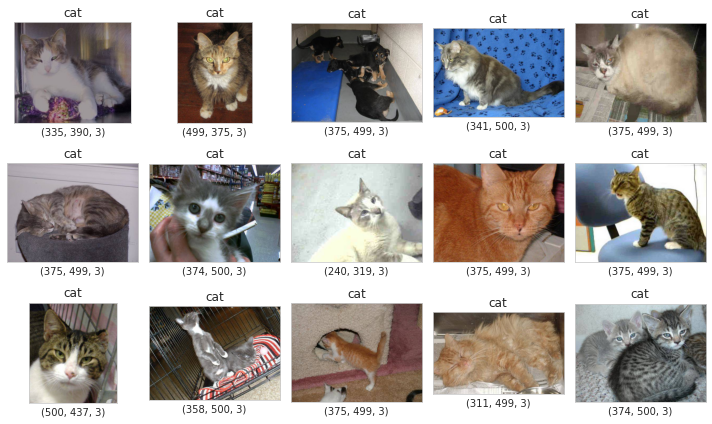

In [73]:
# View a first 15 image from the validation dataset
view_n_image(
    target_dir=validation_path,
    target_class="cat"
)

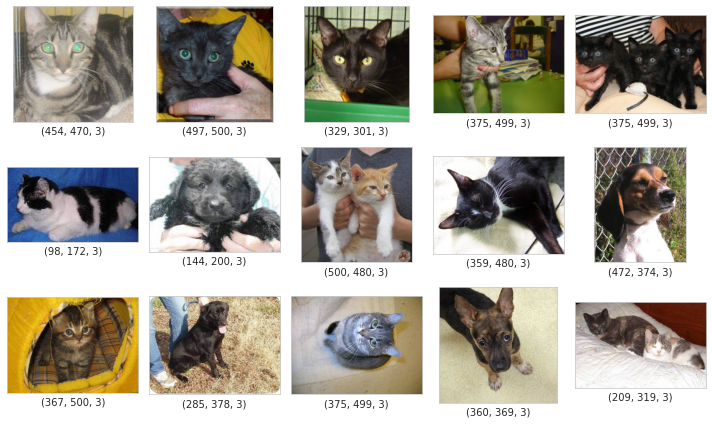

In [74]:
# View a first 15 image from the test dataset
view_n_image(
    target_dir=test_path,
    target_class=""
)

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [37]:
cat_cell.shape

(376, 499, 3)

In [38]:
dog_cell.shape

(99, 100, 3)

In [39]:
x = [imread(train_path+'cat/'+image).shape[0] for image in os.listdir(train_path+'cat')] 
y = [imread(train_path+'cat/'+image).shape[1] for image in os.listdir(train_path+'cat')] 

In [40]:
x[:5]

[324, 299, 302, 79, 500]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


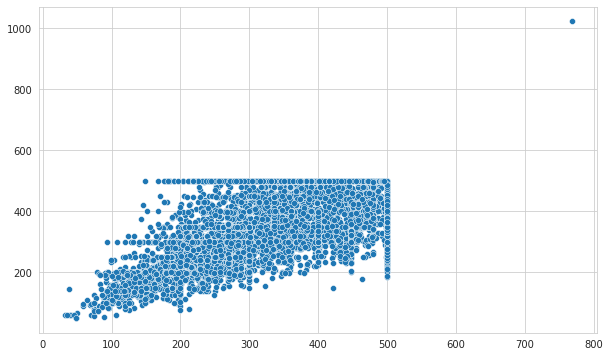

In [41]:
sns.scatterplot(x,y);

In [42]:
np.mean(x), np.median(x)

(356.46712, 374.0)

In [43]:
np.mean(y), np.median(y)

(410.52264, 470.0)

In [44]:
x = [imread(validation_path+'dog/'+image).shape[0] for image in os.listdir(validation_path+'dog')] 
y = [imread(validation_path+'dog/'+image).shape[1] for image in os.listdir(validation_path+'dog')] 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


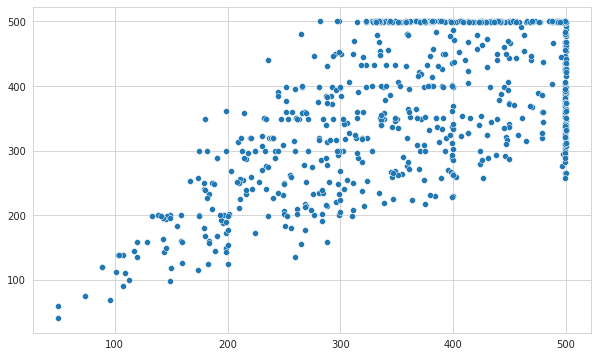

In [45]:
sns.scatterplot(x,y);

In [46]:
np.mean(x), np.median(x)

(364.43230625583567, 374.0)

In [47]:
np.mean(y), np.median(y)

(398.40429505135387, 431.0)

In [48]:
image_shape = (350,400,3)

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [49]:
cat_cell.max()

255

In [50]:
dog_cell.max()

255

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
    rotation_range=15, 
    width_shift_range=0.10, 
    height_shift_range=0.10, 
    rescale=1./255, 
    shear_range=0.1, 
    zoom_range=0.1, 
    horizontal_flip=True, 
    fill_mode='nearest',
    # validation_split=validation_split
)

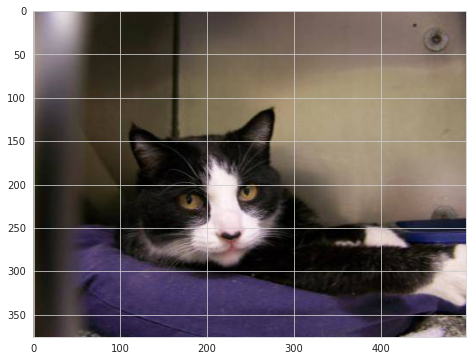

In [52]:
plt.imshow(cat_cell);

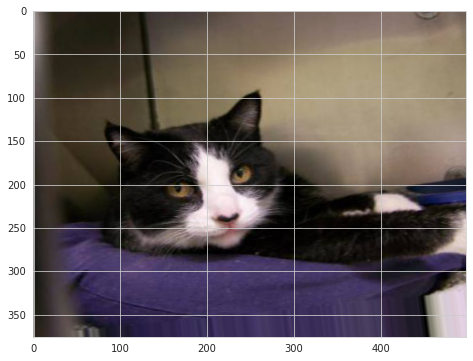

In [53]:
plt.imshow(image_gen.random_transform(cat_cell));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [54]:
image_shape = (350,400,3)
batch_size = 64
seed =42

test_data_gen = image_gen.flow_from_directory(
    directory=test_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    seed=seed,
    shuffle=False,
    # subset='training'
)
train_data_gen = image_gen.flow_from_directory(
    directory=train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    seed=seed,
    shuffle=True,
    # subset='training'
)
validation_data_gen = image_gen.flow_from_directory(
    directory=validation_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    seed=seed,
    shuffle=False,
    # subset='training'
)

Found 0 images belonging to 0 classes.
Found 17526 images belonging to 2 classes.
Found 2290 images belonging to 2 classes.


In [55]:
test_data_gen.class_indices

{}

In [56]:
train_data_gen.class_indices

{'cat': 0, 'dog': 1}

In [57]:
validation_data_gen.class_indices

{'cat': 0, 'dog': 1}

In [58]:
train_data_gen[0][0].shape

(64, 350, 400, 3)

In [59]:
validation_data_gen[0][0].shape

(64, 350, 400, 3)

In [60]:
train_data_gen[0][0][0].shape

(350, 400, 3)

In [61]:
train_data_gen[0][0][0].min(), train_data_gen[0][0][0].max()

(0.0, 0.9901363)

In [62]:
type(train_data_gen)

keras.preprocessing.image.DirectoryIterator

In [63]:
len(test_data_gen)*batch_size, len(train_data_gen)*batch_size, len(validation_data_gen)*batch_size

(0, 17536, 2304)

In [64]:
# how many batch
len(test_data_gen), len(train_data_gen), len(validation_data_gen)

(0, 274, 36)

In [65]:
np.ceil(17526/64)

274.0

In [66]:
# Get a sample of the training data batch 
images, labels = train_data_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(64, 64)

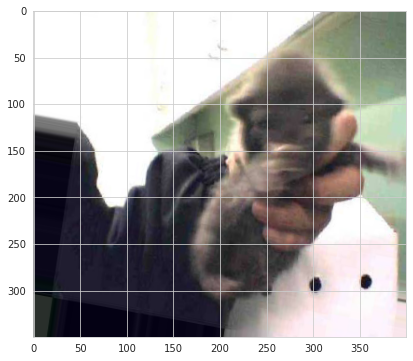

In [67]:
plt.imshow(images[0])

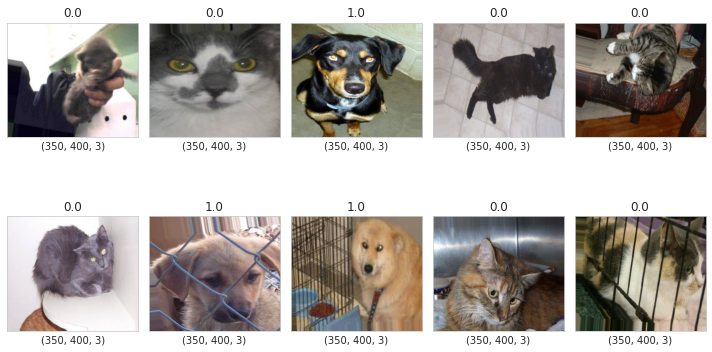

In [142]:
# train_data_gen first 8 images
for i in range(10):
    plt.subplot(2, 5, 1+i)
    # plt.imshow(np.array(images[i], np.uint8))
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.xlabel(f'{images[i].shape}');
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.tight_layout()

# Modelling

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters=64, kernel_size=(5,5), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'Recall', 'AUC', tf.keras.metrics.PrecisionAtRecall(recall=0.8)])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 346, 396, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 173, 198, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 170, 195, 128)     131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 85, 97, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 96, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 48, 64)       0

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights = True)

In [ ]:
%%time
model1.fit(
    train_data_gen,
    epochs=50,
    steps_per_epoch=len(train_data_gen),
    validation_data=validation_data_gen,
    validation_steps=len(validation_data_gen),
    callbacks=[early_stop]
)

Epoch 1/50
274/274 [==============================] - 682s 2s/step - loss: 0.6008 - accuracy: 0.7200 - recall: 0.0921 - auc: 0.6178 - precision_at_recall: 0.3231 - val_loss: 0.6439 - val_accuracy: 0.6314 - val_recall: 0.3035 - val_auc: 0.7198 - val_precision_at_recall: 0.5721
Epoch 2/50
274/274 [==============================] - 633s 2s/step - loss: 0.5356 - accuracy: 0.7461 - recall: 0.2742 - auc: 0.7199 - precision_at_recall: 0.3763 - val_loss: 0.6442 - val_accuracy: 0.6520 - val_recall: 0.3277 - val_auc: 0.7504 - val_precision_at_recall: 0.5892
Epoch 3/50
274/274 [==============================] - 634s 2s/step - loss: 0.4821 - accuracy: 0.7773 - recall: 0.4051 - auc: 0.7861 - precision_at_recall: 0.4356 - val_loss: 0.5893 - val_accuracy: 0.7140 - val_recall: 0.4865 - val_auc: 0.8103 - val_precision_at_recall: 0.6582
Epoch 4/50
274/274 [==============================] - 633s 2s/step - loss: 0.4496 - accuracy: 0.7957 - recall: 0.4849 - auc: 0.8196 - precision_at_recall: 0.4825 - val_l

In [ ]:
# save model permanently and check
model1.save('/content/drive/MyDrive/cat_dog_data1.h5')

In [ ]:
model1.metrics_names

['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall']

In [ ]:
summary = pd.DataFrame(model1.history.history)
summary.tail()

,loss,accuracy,recall,auc,precision_at_recall,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall
9,0.354,0.844,0.651,0.898,0.654,0.418,0.814,0.715,0.895,0.803
10,0.345,0.848,0.663,0.904,0.665,0.480,0.796,0.645,0.892,0.801
11,0.339,0.850,0.675,0.907,0.672,0.459,0.781,0.584,0.901,0.808
12,0.327,0.858,0.686,0.914,0.704,0.485,0.787,0.591,0.911,0.827
13,0.321,0.862,0.692,0.917,0.705,0.504,0.784,0.578,0.910,0.830


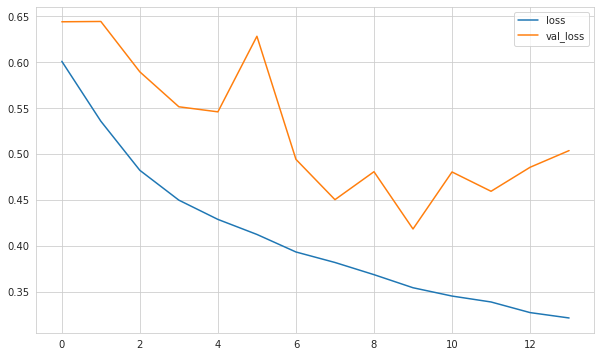

In [ ]:
summary[["loss", "val_loss"]].plot();

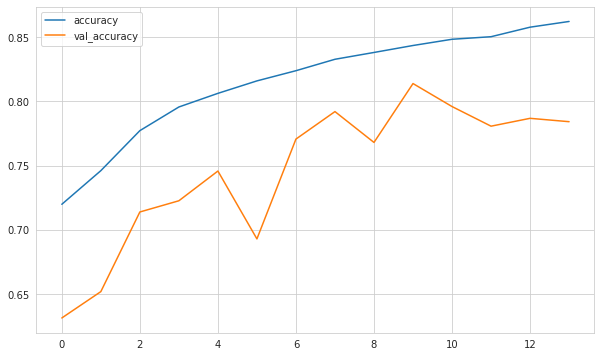

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Modelling-2

In [85]:
model2 = Sequential()

model2.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=image_shape, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))

model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [86]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 346, 396, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 346, 396, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 173, 198, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 170, 195, 64)      65600     
                                                                 
 batch_normalization_1 (Batc  (None, 170, 195, 64)     256       
 hNormalization)                                                 
                                                        

In [87]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights = True)

In [88]:
from sklearn.utils import class_weight

class_weights = dict(zip(np.unique(train_data_gen.classes),
    class_weight.compute_class_weight(
        class_weight = 'balanced',
        classes = np.unique(train_data_gen.classes), 
        y = train_data_gen.classes)
))

In [89]:
%%time
model2.fit(
    train_data_gen,
    epochs=50,
    steps_per_epoch=len(train_data_gen),
    validation_data=validation_data_gen,
    validation_steps=len(validation_data_gen),
    callbacks=[early_stop],
    class_weight=class_weights
)

Epoch 1/50
274/274 [==============================] - 639s 2s/step - loss: 1.0221 - accuracy: 0.5518 - recall: 0.5583 - auc: 0.5682 - precision_at_recall: 0.3072 - val_loss: 0.8626 - val_accuracy: 0.5397 - val_recall: 0.0934 - val_auc: 0.5736 - val_precision_at_recall: 0.5018
Epoch 2/50
274/274 [==============================] - 599s 2s/step - loss: 0.6414 - accuracy: 0.6488 - recall: 0.6395 - auc: 0.6967 - precision_at_recall: 0.3569 - val_loss: 0.7014 - val_accuracy: 0.5349 - val_recall: 0.7619 - val_auc: 0.6073 - val_precision_at_recall: 0.4923
Epoch 3/50
274/274 [==============================] - 608s 2s/step - loss: 0.5730 - accuracy: 0.7115 - recall: 0.6777 - auc: 0.7713 - precision_at_recall: 0.4246 - val_loss: 0.8868 - val_accuracy: 0.4882 - val_recall: 0.9636 - val_auc: 0.6339 - val_precision_at_recall: 0.5124
Epoch 4/50
274/274 [==============================] - 605s 2s/step - loss: 0.5200 - accuracy: 0.7438 - recall: 0.7296 - auc: 0.8178 - precision_at_recall: 0.4879 - val_l

In [92]:
# save model permanently and check
model2.save('/content/drive/MyDrive/cat_dog_data2.h5')

In [93]:
model2.metrics_names

['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall']

In [94]:
summary2 = pd.DataFrame(model2.history.history)
summary2.tail()

,loss,accuracy,recall,auc,precision_at_recall,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall
18,0.189,0.923,0.930,0.978,0.928,0.266,0.895,0.889,0.958,0.932
19,0.174,0.928,0.940,0.981,0.935,0.273,0.887,0.907,0.957,0.932
20,0.175,0.929,0.939,0.981,0.940,0.329,0.879,0.859,0.946,0.896
21,0.163,0.932,0.943,0.983,0.952,0.469,0.839,0.681,0.955,0.941
22,0.165,0.930,0.943,0.983,0.946,0.271,0.895,0.881,0.959,0.930


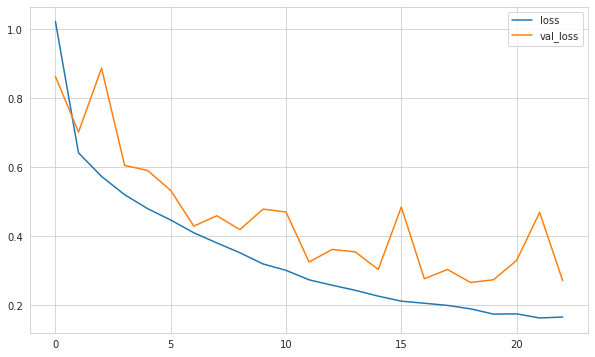

In [95]:
summary2[["loss", "val_loss"]].plot();

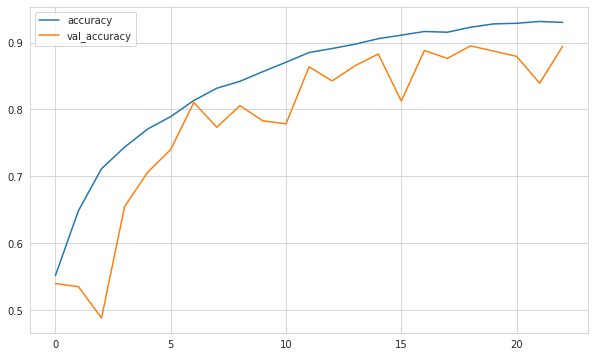

In [96]:
summary2[["accuracy", "val_accuracy"]].plot();

# Compare and Select Models

In [97]:
# metrics = ['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall']
colors  = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history, metrics):
  for n, metric in enumerate(metrics):
    name = str(metric).replace("_"," ").capitalize()
    plt.subplot(3,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'AUC':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

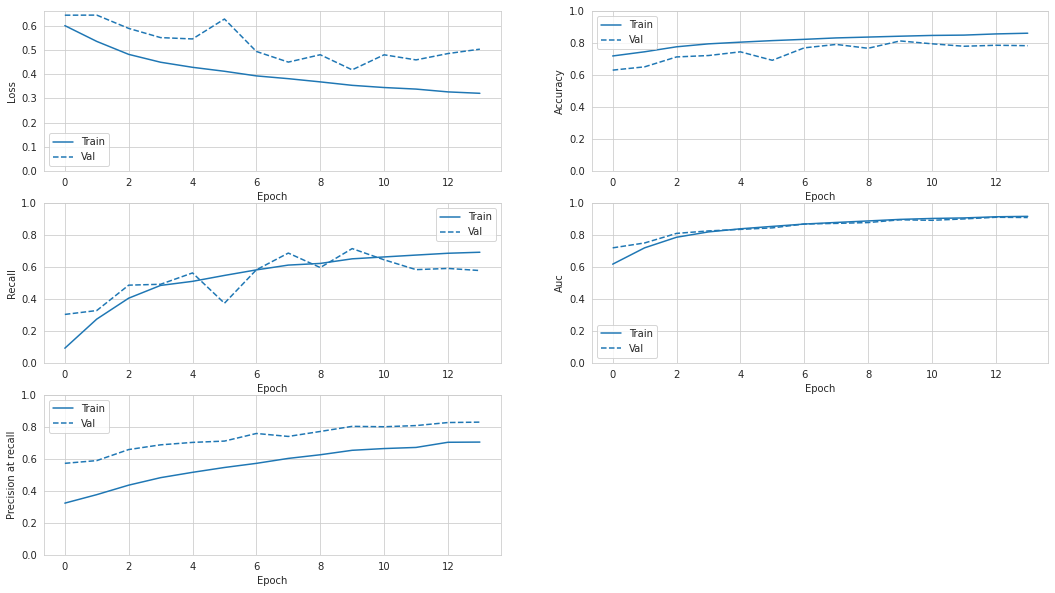

In [ ]:
metrics = summary.columns[:5]
plt.figure(figsize=(18,10))
plot_metrics(model1.history, metrics=metrics)

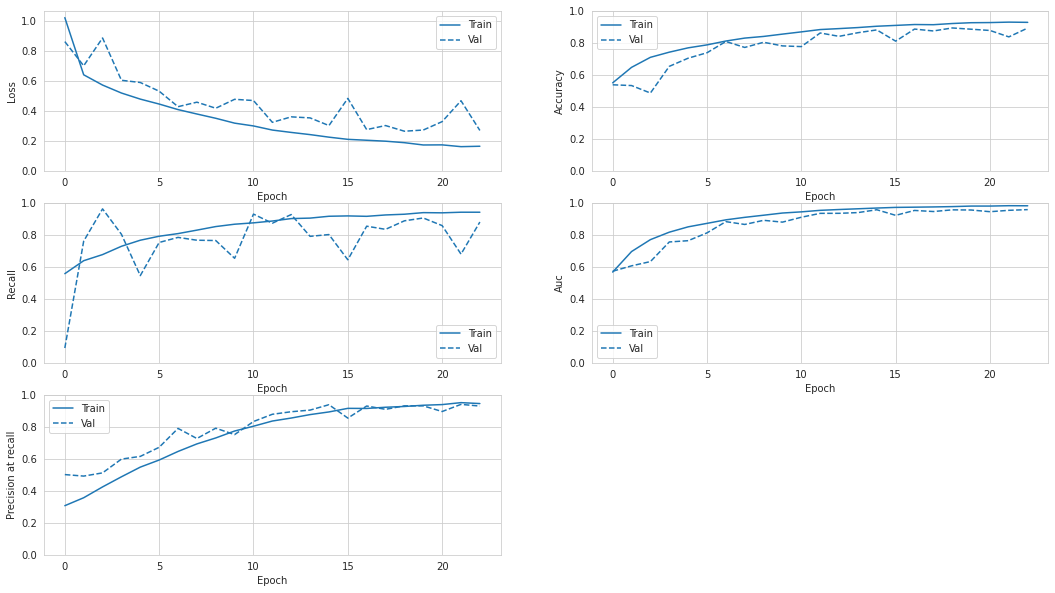

In [98]:
metrics = summary2.columns[:5]
plt.figure(figsize=(18,10))
plot_metrics(model2.history, metrics=metrics)

# Evaluation on Test Data

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
score = model2.evaluate(validation_data_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

36/36 [==============================] - 63s 2s/step - loss: 0.2700 - accuracy: 0.8865 - recall: 0.8833 - auc: 0.9567 - precision_at_recall: 0.9338
Test loss: 0.27004021406173706
Test accuracy: 0.8864628672599792


In [101]:
pred_prob = model2.predict(validation_data_gen)
pred_prob

array([[0.00194756],
       [0.3152463 ],
       [0.03292426],
       ...,
       [0.9890576 ],
       [0.99971205],
       [0.9988618 ]], dtype=float32)

In [102]:
y_pred = pred_prob > 0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [103]:
y_test = validation_data_gen.classes

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1219
           1       0.88      0.89      0.88      1071

    accuracy                           0.89      2290
   macro avg       0.89      0.89      0.89      2290
weighted avg       0.89      0.89      0.89      2290



In [105]:
confusion_matrix(y_test, y_pred)

array([[1088,  131],
       [ 120,  951]])

In [106]:
model2.save('malaria_model.h5')

# Prediction

In [107]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# View a random image
import random

In [108]:
model=load_model('malaria_model.h5')

In [109]:
target_class=random.choice(class_names)
target_class

'dog'

In [110]:
random_image = random.sample(os.listdir(test_path), 1)
random_image

['10802.jpg']

In [122]:
image_path = test_path + random_image[0]
image_path

'./data/test/10802.jpg'

In [123]:
image_path = 'cat-dog.jpg'

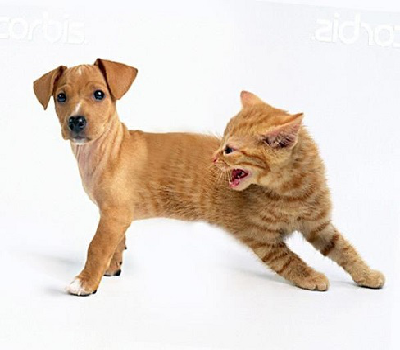

In [129]:
my_image = image.load_img(image_path, target_size=image_shape)
my_image

In [130]:
my_image = image.img_to_array(my_image)
my_image.shape

(350, 400, 3)

In [131]:
my_image = np.expand_dims(my_image, axis=0)
my_image.shape

(1, 350, 400, 3)

In [132]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [133]:
train_data_gen.class_indices

{'cat': 0, 'dog': 1}

# Prediction random Image

In [153]:
def pred_and_plot(model, img_size):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  target_class='' # random.choice(class_names)
  random_image = random.sample(os.listdir(test_path + target_class), 1)
  img_path = test_path + target_class + random_image[0]
  # img_path = 'cat-dog.jpg' # specific local data
  img = image.load_img(img_path, target_size=img_size)
  img = np.array(img)
  
  # Make a prediction
  pred = model.predict(np.expand_dims(img, axis=0))
  print("prediction_probability: ", pred.max())

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

prediction_probability:  1.0


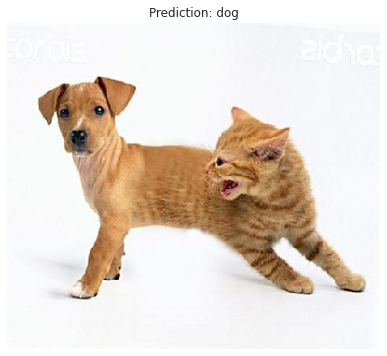

In [154]:
pred_and_plot(model, (350, 400))

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>